In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns



In [3]:
import os
api_key = os.environ.get('YOUTUBE_API_KEY')
channel_ids = ["UC2P4ZF54afaHo7JcDVVCWzQ", "UC2S0KiGusFDXWcxwEorulsA",
               "UC44l9XMwecN5nSgIF2Dvivg", "UCK-Qm2-ZecKa-SBVVKvTISw", "UCiWrjBhlICf_L_RK5y6Vrxw"]
youtube = build('youtube', 'v3', developerKey=api_key)

# Get channel stats

In [4]:
def getChannelsStats(youtube, channel_ids):
    req = youtube.channels().list(part='snippet,contentDetails, statistics', id=','.join(channel_ids))
    response = req.execute()
    return response
stats = getChannelsStats(youtube, channel_ids)


In [5]:
datas = []
for i in range(len(stats['items'])):

    data = dict(
        channelName=stats['items'][i]['snippet']['title'],
        # channelDescription=stats['items'][i]['snippet']['description'],
        url="https://www.youtube.com/"+stats['items'][i]['snippet']['customUrl'],
        subscriberCount=stats['items'][i]['statistics']['subscriberCount'],
        viewCount=stats['items'][i]['statistics']['viewCount'],
        videoCount=stats['items'][i]['statistics']['videoCount'],
        playlist_id=stats['items'][i]['contentDetails']['relatedPlaylists']['uploads'],
        )
    datas.append(data)
datas

[{'channelName': 'Atya Siddiqui ACA ',
  'url': 'https://www.youtube.com/@atyasiddiquiaca',
  'subscriberCount': '712',
  'viewCount': '10461',
  'videoCount': '39',
  'playlist_id': 'UUK-Qm2-ZecKa-SBVVKvTISw'},
 {'channelName': 'be_a_bassi',
  'url': 'https://www.youtube.com/@beabassi',
  'subscriberCount': '860000',
  'viewCount': '107346040',
  'videoCount': '30',
  'playlist_id': 'UU2S0KiGusFDXWcxwEorulsA'},
 {'channelName': 'The Pakistan Experience',
  'url': 'https://www.youtube.com/@thepakistanexperience',
  'subscriberCount': '146000',
  'viewCount': '22184342',
  'videoCount': '531',
  'playlist_id': 'UU44l9XMwecN5nSgIF2Dvivg'},
 {'channelName': 'Pakistan Cricket ',
  'url': 'https://www.youtube.com/@pakistancricket',
  'subscriberCount': '5070000',
  'viewCount': '1304135720',
  'videoCount': '11162',
  'playlist_id': 'UUiWrjBhlICf_L_RK5y6Vrxw'},
 {'channelName': 'SUFISCORE',
  'url': 'https://www.youtube.com/@sufiscore',
  'subscriberCount': '7510000',
  'viewCount': '162879

In [6]:
df = pd.DataFrame(datas)
df

,channelName,url,subscriberCount,viewCount,videoCount,playlist_id
0,Atya Siddiqui ACA,https://www.youtube.com/@atyasiddiquiaca,712,10461,39,UUK-Qm2-ZecKa-SBVVKvTISw
1,be_a_bassi,https://www.youtube.com/@beabassi,860000,107346040,30,UU2S0KiGusFDXWcxwEorulsA
2,The Pakistan Experience,https://www.youtube.com/@thepakistanexperience,146000,22184342,531,UU44l9XMwecN5nSgIF2Dvivg
3,Pakistan Cricket,https://www.youtube.com/@pakistancricket,5070000,1304135720,11162,UUiWrjBhlICf_L_RK5y6Vrxw
4,SUFISCORE,https://www.youtube.com/@sufiscore,7510000,1628799732,306,UU2P4ZF54afaHo7JcDVVCWzQ


In [7]:
df.dtypes

channelName        object
url                object
subscriberCount    object
viewCount          object
videoCount         object
playlist_id        object
dtype: object

### convert datatypes to correct datatypes

In [8]:
df['subscriberCount']=pd.to_numeric(df['subscriberCount'])
df['viewCount']=pd.to_numeric(df['viewCount'])
df['videoCount']=pd.to_numeric(df['videoCount'])
df.dtypes

channelName        object
url                object
subscriberCount     int64
viewCount           int64
videoCount          int64
playlist_id        object
dtype: object

#### barchart color palette, y axis value range

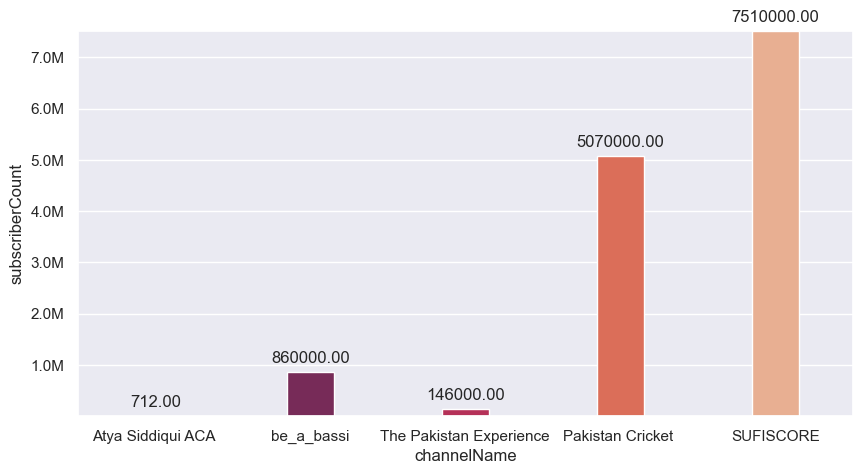

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(rc={'figure.figsize':(10,5)})
palette = sns.color_palette("rocket", len(df))
# palette = sns.color_palette("husl", len(df))

## Define a list of colors based on a condition
# palette = ['red' if x < 1000000 else 'green' for x in df['subscriberCount']]

ax = sns.barplot(x='channelName', y='subscriberCount', hue='channelName',legend=False, data=df,  width=0.3, palette=palette, )

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

# Set y-axis limits
ax.set_ylim(bottom=df['subscriberCount'].min(), top=df['subscriberCount'].max())

# Display values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


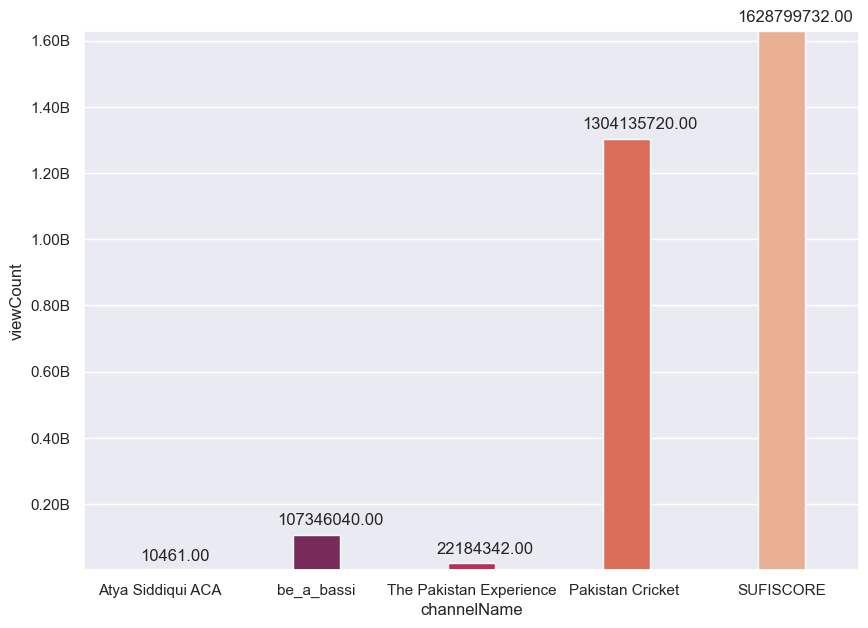

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(rc={'figure.figsize':(10,7)})
palette = sns.color_palette("rocket", len(df))
# palette = sns.color_palette("husl", len(df))

## Define a list of colors based on a condition
# palette = ['red' if x < 1000000 else 'green' for x in df['subscriberCount']]

ax = sns.barplot(x='channelName', y='viewCount', hue='channelName',legend=False, data=df,  width=0.3, palette=palette, )

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.2f}B'))

# Set y-axis limits
ax.set_ylim(bottom=df['viewCount'].min(), top=df['viewCount'].max())

# Display values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (10, 10), textcoords = 'offset points')

plt.show()


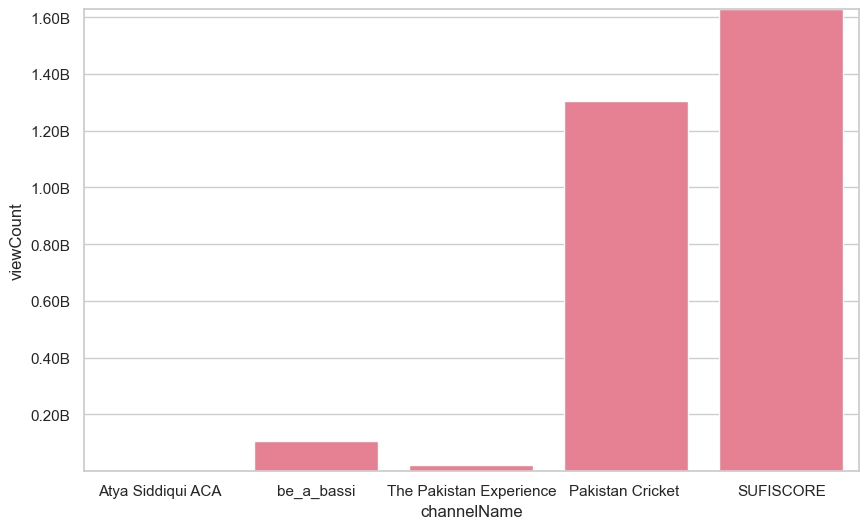

In [11]:
import matplotlib.pyplot as plt
# Set the default Seaborn parameters
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("husl")

# Enable automatic y-axis range adjustment
# sns.set_theme(context="notebook", rc={"axes.autoscale.enable": True})
ax = sns.barplot(x='channelName', y='viewCount',data=df,)
# ax.set_ylim(0, df['viewCount'].max())

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.2f}B'))

# Set y-axis limits
ax.set_ylim(bottom=df['viewCount'].min(), top=df['viewCount'].max())




plt.show()

#### total videos

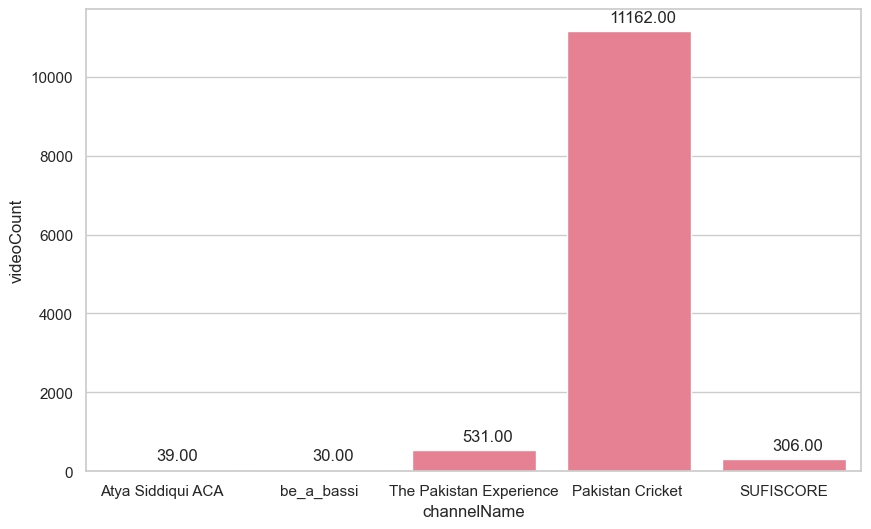

In [12]:
ax = sns.barplot(x='channelName',y='videoCount', data=df)
# Display values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (10, 10), textcoords = 'offset points')


### Scrape, Analyze & visualize `Video Details`

##### get video ids of all videos of a channel and get details of the videos

In [13]:

playlist_id = df.loc[df['channelName'] == 'Atya Siddiqui ACA ', 'playlist_id'].iloc[0]
playlist_id

'UUK-Qm2-ZecKa-SBVVKvTISw'

In [14]:
def getVideoIds(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=20
    )
    response = request.execute()
    if len(response.get('items')):

        items = response['items']
        next_page_token = response.get('nextPageToken')
        more_pages = True
        while more_pages:
            if not next_page_token:
                more_pages=False
            else:
                request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId=playlist_id,
                    maxResults=40,
                    pageToken=next_page_token
                )
                response = request.execute()
                if len(response.get('items')):
                    items += response['items']
                    next_page_token = response.get('nextPageToken')

        return items
    else:

        return []


In [15]:
videos_stats = getVideoIds(youtube=youtube, playlist_id='UUK-Qm2-ZecKa-SBVVKvTISw')
print('--------------------------------------');
print('Total videos =',len(videos_stats));
print('--------------------------------------');


--------------------------------------
Total videos = 40
--------------------------------------


In [16]:
video_ids=[]
for i in range(len(videos_stats)):
    video_ids .append(videos_stats[i]['contentDetails']['videoId'])


In [17]:
len(video_ids)

40

##### function to get video details

In [18]:
def get_video_details(youtube, video_ids):
    items = []
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(part='snippet,contentDetails,statistics',
                                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        items += response['items']
    return items
video_detail_items = get_video_details(youtube, video_ids)

In [19]:

video_details_dicts = []
for i  in range(len(video_detail_items)):    
    d = dict(
        Title=video_detail_items[i]['snippet']['title'],
        Published_date=video_detail_items[i]['snippet']['publishedAt'],
        viewCount=video_detail_items[i]['statistics']['viewCount'],
        likeCount=video_detail_items[i]['statistics']['likeCount'] if 'linkCount' in video_detail_items[i]['statistics'] else 0,
        commentCount=video_detail_items[i]['statistics']['commentCount'],
        )
    video_details_dicts.append(d)
video_details_dicts

[{'Title': 'Would qualifying CA Fulfill your dreams? | Podcast with Moazzam siddique ACA | Atya Siddiqui ACA',
  'Published_date': '2023-10-26T12:36:41Z',
  'viewCount': '1007',
  'likeCount': 0,
  'commentCount': '21'},
 {'Title': 'CAF-04 | Business Law | MCQ by Atya Siddiqui ACA',
  'Published_date': '2023-10-22T16:13:04Z',
  'viewCount': '31',
  'likeCount': 0,
  'commentCount': '0'},
 {'Title': 'CAF-07 | Company Law | MCQ by Atya Siddiqui ACA',
  'Published_date': '2023-10-22T15:25:15Z',
  'viewCount': '40',
  'likeCount': 0,
  'commentCount': '0'},
 {'Title': 'CAF-08 | Audit and Assurance | MCQ by Atya Siddiqui ACA',
  'Published_date': '2023-10-22T15:25:08Z',
  'viewCount': '18',
  'likeCount': 0,
  'commentCount': '1'},
 {'Title': 'CAF-04 | Business Law | MCQ by Atya Siddiqui ACA',
  'Published_date': '2023-10-18T14:33:31Z',
  'viewCount': '22',
  'likeCount': 0,
  'commentCount': '0'},
 {'Title': 'CAF-04 | Business Law | MCQ by Atya Siddiqui ACA',
  'Published_date': '2023-10-1

In [20]:
video_data_df = pd.DataFrame(video_details_dicts)

##### Top 10 videos of the channel

In [21]:
video_data_df['Published_date']=pd.to_datetime(video_data_df['Published_date']).dt.date
video_data_df['viewCount'] = pd.to_numeric(video_data_df['viewCount'])
video_data_df['likeCount'] = pd.to_numeric(video_data_df['likeCount'])
video_data_df['commentCount'] = pd.to_numeric(video_data_df['commentCount'])


In [22]:
top10_videos = video_data_df.sort_values(by='viewCount', ascending=False).head(10)
top10_videos

,Title,Published_date,viewCount,likeCount,commentCount
11,How to Become Successful Chartered Accountant ...,2023-10-04,2247,0,28
30,What is CA-ICAP | Explained in easy words | Mo...,2023-09-17,2084,0,36
36,CAF-08 | Autumn 2023 Attempt | paper feedback ...,2023-09-12,1467,0,14
0,Would qualifying CA Fulfill your dreams? | Pod...,2023-10-26,1007,0,21
39,CAF-04 | Autumn 2023 Attempt | Paper feedback ...,2023-09-08,596,0,13
26,CAF-08 | Audit and Assurance | Online Zoom Rec...,2023-09-20,474,0,7
35,CAF-08 | Online session | Spring-2024 Attemtpt...,2023-09-15,329,0,7
32,CAF-08 | Difference between Audit Risk and Bus...,2023-09-17,313,0,4
38,CAF-07 | Autumn 2023 Attempt | Paper Feedback ...,2023-09-10,303,0,6
6,HOW TO STUDY FOR CAF-08 | ICAP | CAF-08 Bhasha...,2023-10-16,273,0,3


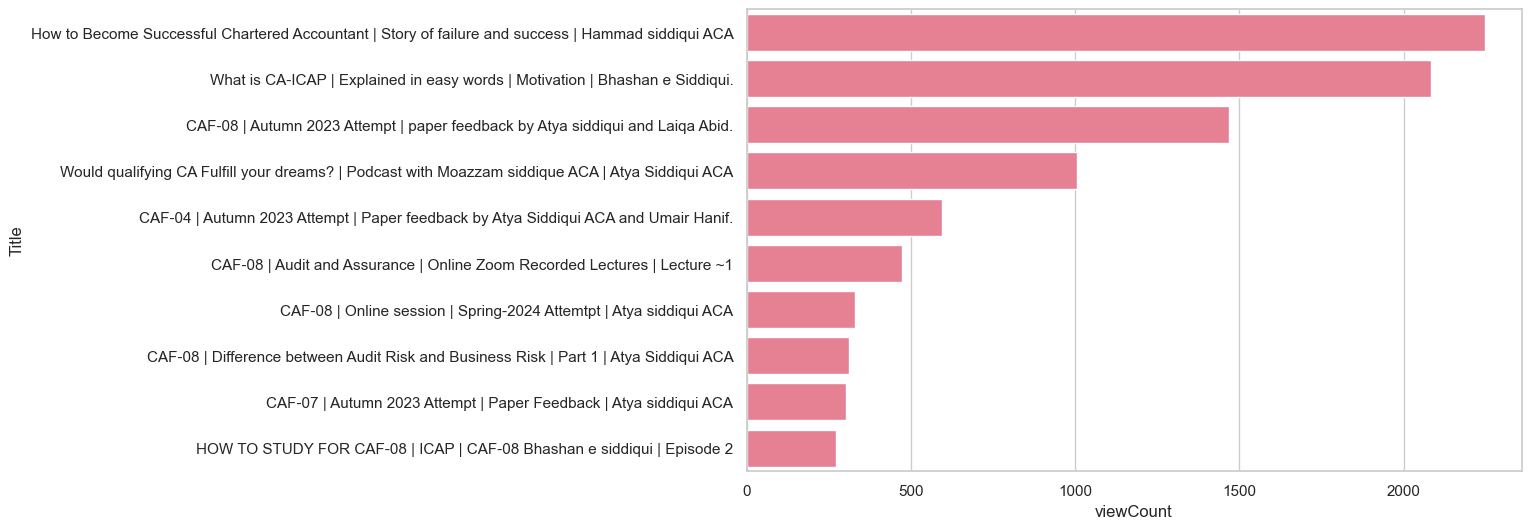

In [23]:
ax1 = sns.barplot(x='viewCount',y='Title',data=top10_videos)

### Monthly Videos analysis per channel

In [32]:
video_data_df['month'] = pd.to_datetime(video_data_df['Published_date']).dt.strftime('%b')
videos_per_month = video_data_df.groupby('month', as_index=False).size()

In [35]:
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
videos_per_month.index=pd.CategoricalIndex(videos_per_month['month'],categories=sort_order,ordered=True)
videos_per_month=videos_per_month.sort_index()

,month,size
month,,
Sep,Sep,28
Oct,Oct,12


<Axes: xlabel='month', ylabel='size'>

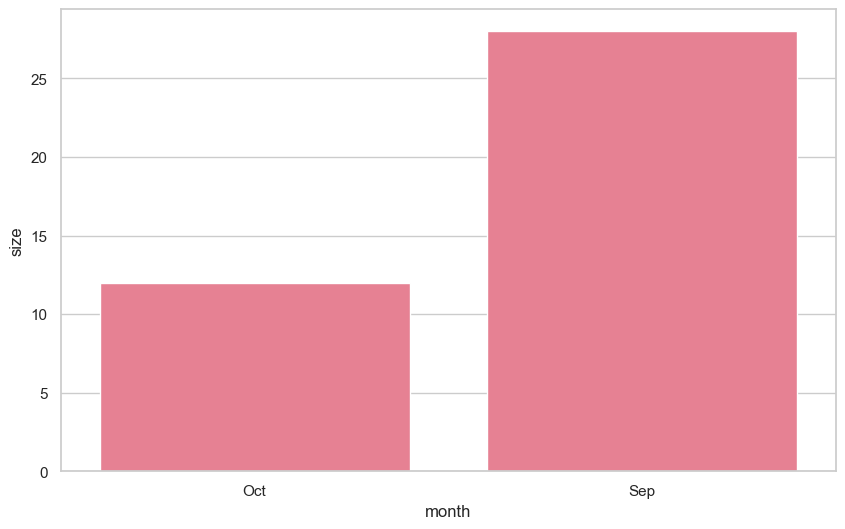

In [36]:
sns.barplot(x='month',y='size', data=videos_per_month)